# Setup conformations from previous cg metainference for fitting

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy.linalg as LA
from MDAnalysis.analysis.align import *
%matplotlib inline

/home/brandani/software/anaconda3/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
sys.path.append('../')
from tools1cpn import *

## Select 30kbegion

although in the considered application the size of the 1kb region is the same as the 1CPN, the same approach can be applied when the 1kb region is larger

In [3]:
start_1cpn=0
end_1cpn  =30000
res_1cpn  =200
start_cg  =0
end_cg    =30000
res_cg    =1000

N1cpn=150
cg_fac=5
Ncg  =N1cpn//cg_fac
Ncg

30

now for each group of 5 nucleosomes in the 1cpn model, link to corresponding bead in the cg model

In [4]:
map2cg={}
for i in range(N1cpn):
    loc=start_1cpn+i*res_1cpn
    icg=int((loc-start_cg)/res_cg)
    map2cg[i]=icg
map2cg_arr=np.array(list(map2cg.values()))

In [5]:
# remove elements that have less than 5 points
for i,icg in list(map2cg.items()):
    if len(map2cg_arr[map2cg_arr==icg])<cg_fac:
        map2cg.pop(i)
len(map2cg)

150

In [6]:
# now make the opposite map, from cg model to 1cpn
map2cpn={}
for i,icg in list(map2cg.items()):
    if icg not in map2cpn:
        map2cpn[icg]=[]
    map2cpn[icg].append(i)
map2cpn

{0: [0, 1, 2, 3, 4],
 1: [5, 6, 7, 8, 9],
 2: [10, 11, 12, 13, 14],
 3: [15, 16, 17, 18, 19],
 4: [20, 21, 22, 23, 24],
 5: [25, 26, 27, 28, 29],
 6: [30, 31, 32, 33, 34],
 7: [35, 36, 37, 38, 39],
 8: [40, 41, 42, 43, 44],
 9: [45, 46, 47, 48, 49],
 10: [50, 51, 52, 53, 54],
 11: [55, 56, 57, 58, 59],
 12: [60, 61, 62, 63, 64],
 13: [65, 66, 67, 68, 69],
 14: [70, 71, 72, 73, 74],
 15: [75, 76, 77, 78, 79],
 16: [80, 81, 82, 83, 84],
 17: [85, 86, 87, 88, 89],
 18: [90, 91, 92, 93, 94],
 19: [95, 96, 97, 98, 99],
 20: [100, 101, 102, 103, 104],
 21: [105, 106, 107, 108, 109],
 22: [110, 111, 112, 113, 114],
 23: [115, 116, 117, 118, 119],
 24: [120, 121, 122, 123, 124],
 25: [125, 126, 127, 128, 129],
 26: [130, 131, 132, 133, 134],
 27: [135, 136, 137, 138, 139],
 28: [140, 141, 142, 143, 144],
 29: [145, 146, 147, 148, 149]}

## Align cg conformation to 1cpn and print pdb

In [7]:
confs_cg  =[]
confs_1cpn=[]
Nrep=64
Neq=64
for i in range(Nrep):
    confs_cg.append(mda.Universe('run_multi.%d.t1000.pdb'%i,'run_multi.%d.t1000.pdb'%i))
    confs_1cpn.append(read_dump('in.dump','eq%d.dump'%(i%Neq))[-1])

/home/brandani/software/anaconda3/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [8]:
confs_1cpn[0].shape

(150, 3)

In [9]:
# setup references
refs=[] # CG bead locations in the 1CPN conformations
ref_natoms=len(map2cpn)
for i in range(Nrep):
    refs.append(np.zeros((ref_natoms,3)))
    iref=0
    for icg in map2cpn:
        for i1cpn in map2cpn[icg]:
            refs[-1][iref]+=confs_1cpn[i][i1cpn]/cg_fac
        iref+=1
refs[0]

array([[ 7.73562000e+02, -2.93422000e+03,  5.14164800e+02],
       [ 5.70835000e+02, -2.77388600e+03,  4.19556000e+02],
       [ 5.59464800e+02, -2.45943000e+03,  4.81894400e+02],
       [ 4.29135800e+02, -2.28293000e+03,  4.58109400e+02],
       [ 4.92769000e+02, -2.05969400e+03,  4.03708600e+02],
       [ 3.14327400e+02, -1.89201800e+03,  3.97845000e+02],
       [ 3.26662600e+02, -1.73406200e+03,  2.57767600e+02],
       [ 3.83418400e+02, -1.51256200e+03,  1.95223800e+02],
       [ 4.49087600e+02, -1.41230600e+03,  8.08338000e+01],
       [ 2.92482000e+02, -1.08810520e+03,  2.12240840e+02],
       [ 1.87033880e+02, -9.05736800e+02,  2.26748000e+02],
       [ 6.42304400e+01, -7.79602400e+02,  9.45726860e+01],
       [-1.63474200e+01, -5.58636400e+02, -9.38517800e+01],
       [-8.75860000e-01, -3.50916400e+02,  3.07926800e+01],
       [-9.58655600e+01, -1.23038700e+02, -2.62324700e+01],
       [-1.70896800e+01,  1.62343402e+02,  1.05729040e+02],
       [ 6.48506000e+01,  3.34805000e+02

In [10]:
# check distance between neighboring beads
tmp=[]
for i in range(1,ref_natoms):
    tmp.append(LA.norm( refs[0][i]-refs[0][i-1] ))
tmp=np.array(tmp)
tmp.mean()

270.8465327693181

In [11]:
# end-to-end distance
LA.norm( refs[0][ref_natoms-1]-refs[0][0] )

6075.150233212031

In [12]:
for ts in confs_cg[0].trajectory:
    pos=confs_cg[0].atoms.positions
    tmp=[]
    for i in range(1,len(pos)):
        tmp.append(LA.norm( pos[i]-pos[i-1] ))
    tmp=np.array(tmp)
    print(tmp.mean())

1.3296026


In [13]:
sel_natoms=len(map2cpn)
bead_size=220. # A, the size of one bead
out_scale=0.1 # scale to nm so that conformation can be printed out
smd_ori=[] # initial positions during smd
smd_ref=[] # restraint positions for smd
for i in range(Nrep):
    # make sure to be at the first frame
    for ts in confs_cg[i].trajectory:
        out_fname='cg_sel_fit.%d.pdb'%i
        # reference for alignment
        ref=np.array(refs[i])
        smd_ori.append(np.array(ref))
        ref_com=ref.mean(axis=0)
        # selection to print out
        sel_string='index '
        for icg in map2cpn: sel_string+='%d '%icg
        sel=confs_cg[i].select_atoms(sel_string)
        # save original positions
        original=np.array(sel.positions)
        # convert units of sel
        sel.positions*=bead_size
        sel_com=sel.center_of_geometry()
        # align sel to ref
        # move both to origin
        sel.translate(-sel_com)
        ref-=ref_com
        # find optimal rotation matrix
        R,rmsd=rotation_matrix(sel.positions,ref)
        # rotate sel
        sel.rotate(R)
        # translate to the ref com
        sel.translate(+ref_com)
        ref+=ref_com
        # save restraint positions for smd
        smd_ref.append(np.array(sel.positions))
        # scale to print out
        sel.positions*=out_scale
        # print out
        with mda.Writer(out_fname,sel_natoms) as W:
            W.write(sel.atoms)
        # print out coarse grained 1cpn model for comparison
        sel.positions=np.array(ref)*out_scale
        with mda.Writer('cg_sel_1cpn.%d.pdb'%i,sel_natoms) as W:
            W.write(sel.atoms)
        # reset positions to original values
        sel.positions=np.array(original)
        break

/home/brandani/software/anaconda3/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning: Found no information for attr: 'elements' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"


## now print out lamms smd settings

In [14]:
map2cpn

{0: [0, 1, 2, 3, 4],
 1: [5, 6, 7, 8, 9],
 2: [10, 11, 12, 13, 14],
 3: [15, 16, 17, 18, 19],
 4: [20, 21, 22, 23, 24],
 5: [25, 26, 27, 28, 29],
 6: [30, 31, 32, 33, 34],
 7: [35, 36, 37, 38, 39],
 8: [40, 41, 42, 43, 44],
 9: [45, 46, 47, 48, 49],
 10: [50, 51, 52, 53, 54],
 11: [55, 56, 57, 58, 59],
 12: [60, 61, 62, 63, 64],
 13: [65, 66, 67, 68, 69],
 14: [70, 71, 72, 73, 74],
 15: [75, 76, 77, 78, 79],
 16: [80, 81, 82, 83, 84],
 17: [85, 86, 87, 88, 89],
 18: [90, 91, 92, 93, 94],
 19: [95, 96, 97, 98, 99],
 20: [100, 101, 102, 103, 104],
 21: [105, 106, 107, 108, 109],
 22: [110, 111, 112, 113, 114],
 23: [115, 116, 117, 118, 119],
 24: [120, 121, 122, 123, 124],
 25: [125, 126, 127, 128, 129],
 26: [130, 131, 132, 133, 134],
 27: [135, 136, 137, 138, 139],
 28: [140, 141, 142, 143, 144],
 29: [145, 146, 147, 148, 149]}

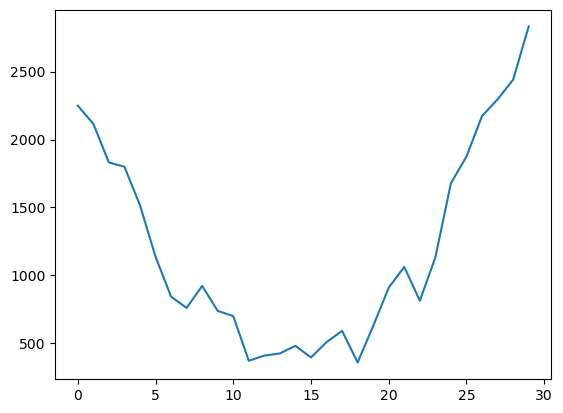

In [15]:
# check distances between target and initial position
for i in range(1):
    plt.plot(LA.norm(smd_ref[i]-smd_ori[i],axis=1))

In [17]:
# setup using lammps and plumed
conf,indices=read_dump('in.dump','in.dump',return_indices=True)
scale_plm=0.1 # comvert to nm
for i in range(Nrep):
    lmp_template=open('in.runXXX','r')
    lmp_out=open('in.run%d'%i,'w')
    plm_out=open('plumed_smd%d.dat'%i,'w')
    for l in lmp_template.readlines():
        l=l.replace('XXX','%d'%i)
        l=l.replace('YYY','%d'%(i%Neq))
        lmp_out.write(l)
    # make plumed file
    plm_out.write('WHOLEMOLECULES STRIDE=1 ENTITY0=1-4067\n\n')
    j=0
    for icg in map2cpn:
        # target position
        X,Y,Z=scale_plm*smd_ref[i][j]
        plm_out.write('ref%d: FIXEDATOM AT=%.3f,%.3f,%.3f\n'%(icg,X,Y,Z))
        # cvs
        s='c%d: CENTER ATOMS='%(icg)
        for i1cpn in map2cpn[icg]: s+='%d,'%(indices[i1cpn])
        plm_out.write(s[:-1]+'\n')
        plm_out.write('d%d: DISTANCE ATOMS=ref%d,c%d\n'%(icg,icg,icg))
        # write the moving restraint
        K=100.0
        R0=scale_plm*LA.norm(smd_ref[i][j]-smd_ori[i][j])
        plm_out.write('MOVINGRESTRAINT ...\n')
        plm_out.write('ARG=d%d\n'%(icg))
        plm_out.write('VERSE=U\n')
        plm_out.write('STEP0=0         AT0=%.1f KAPPA0=%.1f\n'%(R0,K))
        plm_out.write('STEP1=80000000  AT1=0.0 KAPPA1=%.1f\n'%(K))
        plm_out.write('STEP2=100000000 AT2=0.0 KAPPA2=%.1f\n'%(K))
        plm_out.write('... MOVINGRESTRAINT\n')
        plm_out.write('\n')
        j+=1
    plm_out.write('PRINT ARG=* STRIDE=100000 FILE=colvar_smd%d.dat'%(i))
    lmp_template.close()
    lmp_out.close()
    plm_out.close()